In [83]:
import calendar
import numpy as np
import pandas as pd
#from pandas.core.frame import DataFrame
#from pandas.core.series import Series #이렇게 불러도 됨.
import seaborn as sns # 통계적 plot
from scipy import stats #통계
import missingno as msno #결측치 보는 plot
from datetime import datetime #day
import matplotlib.pyplot as plt
import warnings #에러는 아닌데 주희하는게 뜨는것을 방지.
warnings.filterwarnings('ignore')

In [84]:
data = pd.read_csv('C:/Users/405/Desktop/새 폴더 (2)/insurance.csv')

print(data)


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [85]:
smoker_mapping = {'yes': 0, 'no': 1}
data['smoker'] = data['smoker'].map(smoker_mapping)

smoker_data = data[data['smoker'] == 0]
smoker_data_sorted = smoker_data.sort_values('charges')

if len(smoker_data_sorted) > 0:
    lowest_charge_smoker = smoker_data_sorted.iloc[0]
    print(lowest_charge_smoker)
else:
    print("No smoker data found")

age                 18
sex               male
bmi              17.29
children             2
smoker               0
region       northeast
charges     12829.4551
Name: 250, dtype: object


In [86]:
smoker_mapping = {'yes': 0, 'no': 1}
data['smoker'] = data['smoker'].map(smoker_mapping)

non_smoker_data = data[data['smoker'] == 1]
non_smoker_data_sorted = non_smoker_data.sort_values('charges')

if len(non_smoker_data_sorted) > 0:
    lowest_charge_non_smoker = non_smoker_data_sorted.iloc[0]
    print(lowest_charge_non_smoker)
else:
    print("No non-smoker data found")

No non-smoker data found


In [87]:
print(data.head())
print(data.describe())

   age     sex     bmi  children  smoker     region      charges
0   19  female  27.900         0     NaN  southwest  16884.92400
1   18    male  33.770         1     NaN  southeast   1725.55230
2   28    male  33.000         3     NaN  southeast   4449.46200
3   33    male  22.705         0     NaN  northwest  21984.47061
4   32    male  28.880         0     NaN  northwest   3866.85520
               age          bmi     children  smoker       charges
count  1338.000000  1338.000000  1338.000000     0.0   1338.000000
mean     39.207025    30.663397     1.094918     NaN  13270.422265
std      14.049960     6.098187     1.205493     NaN  12110.011237
min      18.000000    15.960000     0.000000     NaN   1121.873900
25%      27.000000    26.296250     0.000000     NaN   4740.287150
50%      39.000000    30.400000     1.000000     NaN   9382.033000
75%      51.000000    34.693750     2.000000     NaN  16639.912515
max      64.000000    53.130000     5.000000     NaN  63770.428010


In [88]:
lowest_charge = data.sort_values('charges').iloc[0]
print(lowest_charge)

age                18
sex              male
bmi             23.21
children            0
smoker            NaN
region      southeast
charges     1121.8739
Name: 940, dtype: object


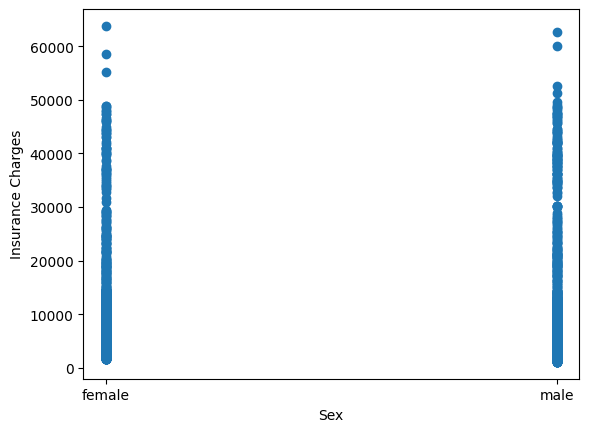

In [89]:
plt.scatter(data['sex'], data['charges'])
plt.xlabel('Sex')
plt.ylabel('Insurance Charges')
plt.show()

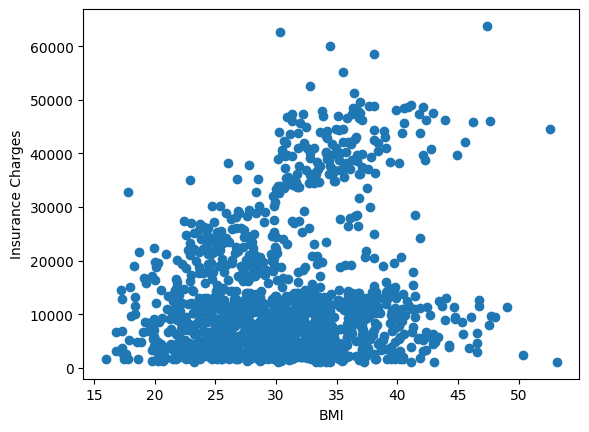

In [90]:
plt.scatter(data['bmi'], data['charges'])
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.show()

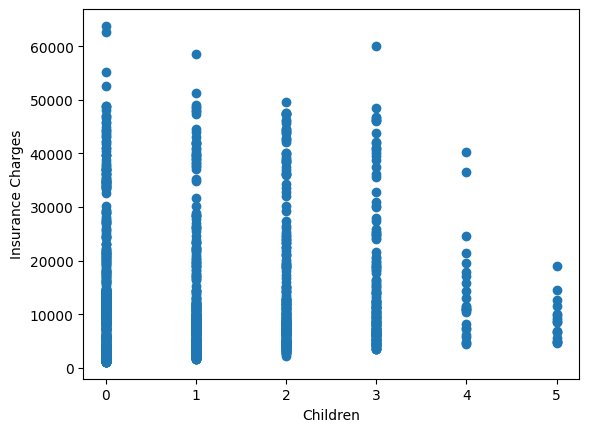

In [91]:
plt.scatter(data['children'], data['charges'])
plt.xlabel('Children')
plt.ylabel('Insurance Charges')
plt.show()

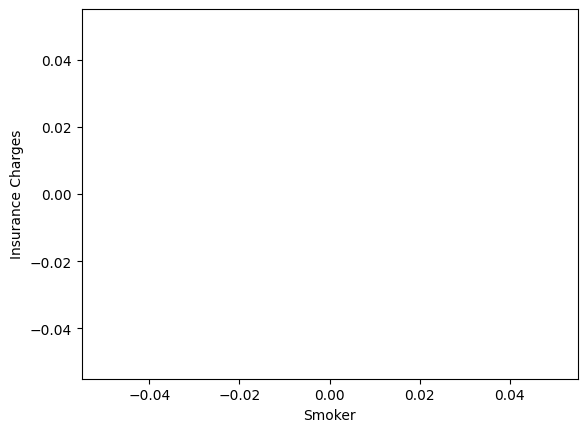

In [92]:
plt.scatter(data['smoker'], data['charges'])
plt.xlabel('Smoker')
plt.ylabel('Insurance Charges')
plt.show()


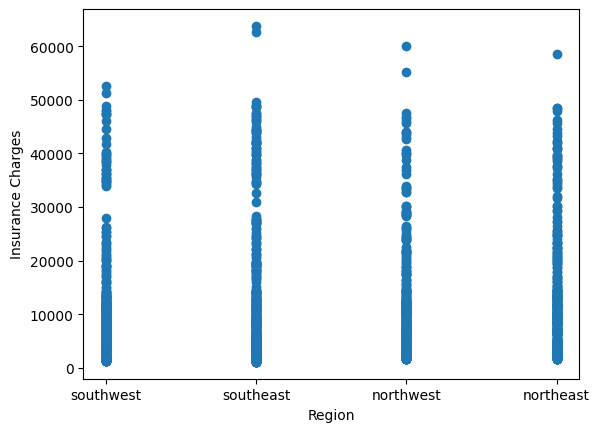

In [93]:
plt.scatter(data['region'], data['charges'])
plt.xlabel('Region')
plt.ylabel('Insurance Charges')
plt.show()

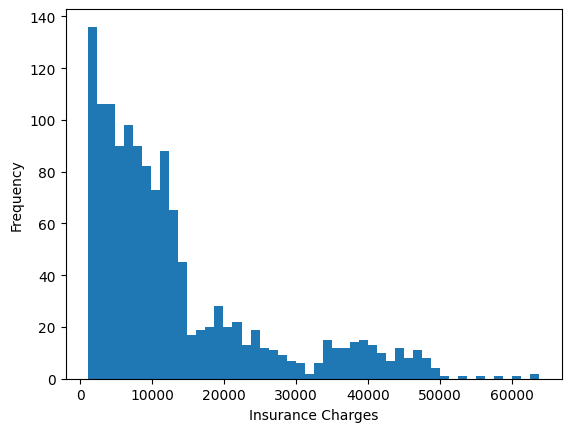

In [94]:
# 전체 보험료(charges) 분포
plt.hist(data['charges'], bins=50)
plt.xlabel('Insurance Charges')
plt.ylabel('Frequency')
plt.show()


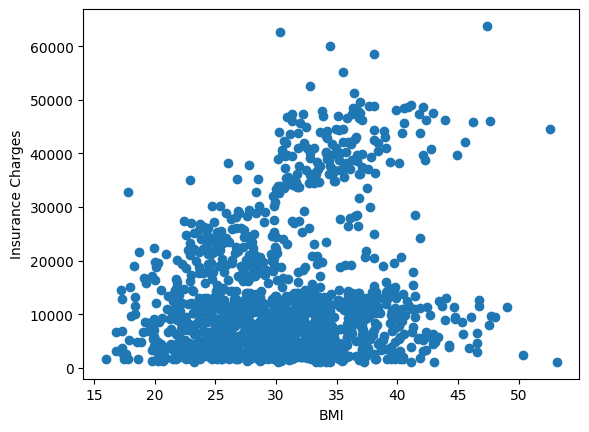

In [95]:
plt.scatter(data['bmi'], data['charges'])
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.show()

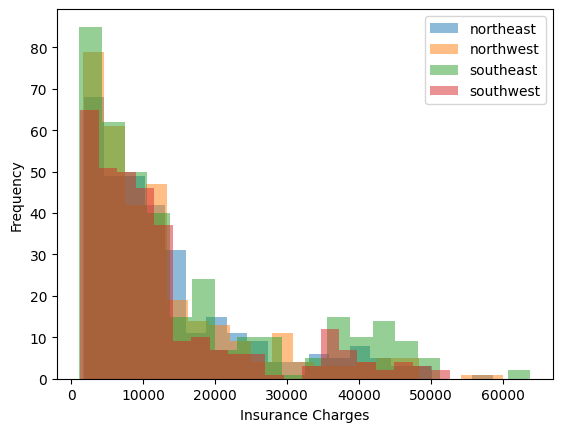

In [96]:
regions = ['northeast', 'northwest', 'southeast', 'southwest']
for region in regions:
    plt.hist(data[data['region'] == region]['charges'], alpha=0.5, label=region, bins=20)
plt.legend()
plt.xlabel('Insurance Charges')
plt.ylabel('Frequency')
plt.show()

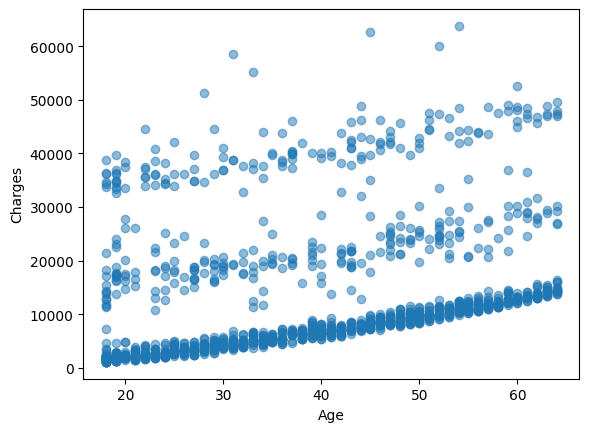

In [97]:
plt.scatter(data['age'], data['charges'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

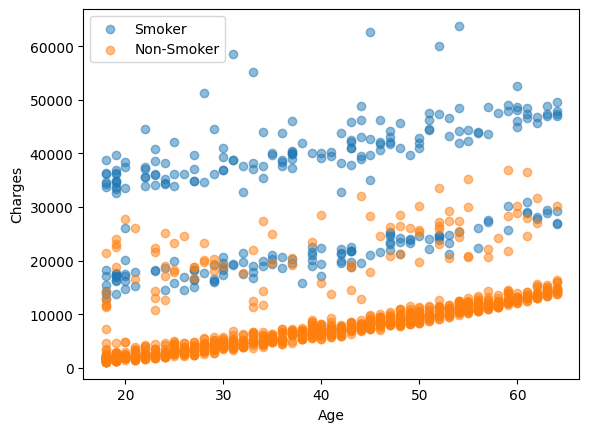

In [165]:
# 흡연자와 비흡연자 데이터 분리
smoker_data = data[data['smoker'] == 'yes']
non_smoker_data = data[data['smoker'] == 'no']

# 산점도 그리기
plt.scatter(smoker_data['age'], smoker_data['charges'], alpha=0.5, label='Smoker')
plt.scatter(non_smoker_data['age'], non_smoker_data['charges'], alpha=0.5, label='Non-Smoker')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

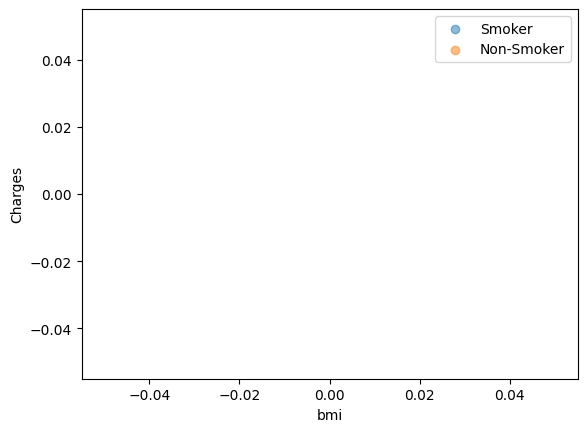

In [99]:
# 흡연자와 비흡연자 데이터 분리
smoker_data = data[data['smoker'] == 'yes']
non_smoker_data = data[data['smoker'] == 'no']

# 산점도 그리기
plt.scatter(smoker_data['bmi'], smoker_data['charges'], alpha=0.5, label='Smoker')
plt.scatter(non_smoker_data['bmi'], non_smoker_data['charges'], alpha=0.5, label='Non-Smoker')
plt.xlabel('bmi')
plt.ylabel('Charges')
plt.legend()
plt.show()

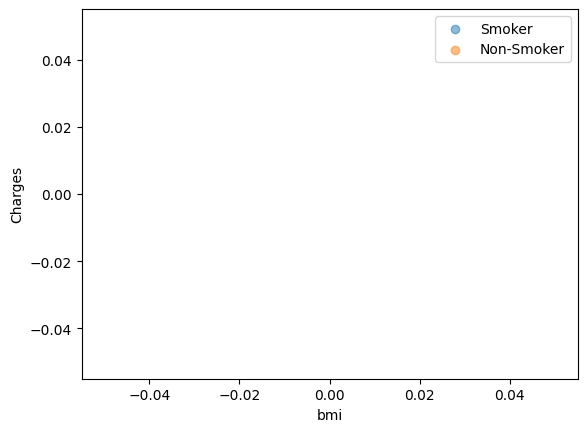

In [100]:
# 흡연자와 비흡연자 데이터 분리
smoker_data = data[data['smoker'] == 'yes']
non_smoker_data = data[data['smoker'] == 'no']

# 산점도 그리기
plt.scatter(smoker_data['bmi'], smoker_data['charges'], alpha=0.5, label='Smoker')
plt.scatter(non_smoker_data['bmi'], non_smoker_data['charges'], alpha=0.5, label='Non-Smoker')
plt.xlabel('bmi')
plt.ylabel('Charges')
plt.legend()
plt.show()

In [101]:
type(data)

pandas.core.frame.DataFrame

In [102]:

import pandas as pd

# 필요한 컬럼 추출
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

# 범주형 변수 숫자 인코딩
X['sex'] = X['sex'].replace({'female': 0, 'male': 1})
X['smoker'] = X['smoker'].replace({'no': 0, 'yes': 1})
X = pd.get_dummies(X, columns=['region'])

# 예측을 위한 입력 데이터
new_data = {'age': 18, 'sex': 1, 'bmi': 17.21, 'children': 2, 'smoker': 0, 'region_northeast': 0, 'region_northwest': 0, 'region_southeast': 1, 'region_southwest': 0}
X_new = pd.DataFrame([new_data])

print(X_new)

# 새로운 데이터에 대한 예측

   age  sex    bmi  children  smoker  region_northeast  region_northwest   
0   18    1  17.21         2       0                 0                 0  \

   region_southeast  region_southwest  
0                 1                 0  


In [103]:
data.shape



(1338, 7)

In [104]:
import pandas as pd


# bmi가 가장 높은 row 찾기
max_bmi_row = data.loc[data['bmi'].idxmax()]


print(max_bmi_row['bmi'], max_bmi_row)

53.13 age                18
sex              male
bmi             53.13
children            0
smoker            NaN
region      southeast
charges     1163.4627
Name: 1317, dtype: object


In [105]:
import pandas as pd

# 데이터 불러오기
# bmi값을 4등분으로 나누기
data['bmi_category'] = pd.cut(data['bmi'], bins=10, labels=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','i','j'])

# 각 구간에서의 보험료 평균 계산
charges_by_bmi = data.groupby('bmi_category')['charges'].mean()
print(charges_by_bmi)

# 17, 35 , 45

bmi_category
a     9110.037055
b     9596.427552
c    11216.516587
d    11802.998038
e    14316.471932
f    17968.274855
g    14542.878372
h    17405.072524
i    17558.375058
j    16034.305367
Name: charges, dtype: float64


In [106]:
# 'smoker' 열이 'no'인 데이터 선택
non_smoker_data = data[data['smoker'] == 'no']

# bmi값을 4등분으로 나누기
non_smoker_data['bmi_category'] = pd.cut(non_smoker_data['bmi'], bins=10, labels=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','i','j'])

# 각 구간에서의 보험료 평균 계산
charges_by_bmi = non_smoker_data.groupby('bmi_category')['charges'].mean()
print(charges_by_bmi)

ValueError: Cannot cut empty array

In [ ]:
max_charge_bmi_category = charges_by_bmi.idxmax()
print('The category with the highest average insurance charges is', max_charge_bmi_category)

The category with the highest average insurance charges is f


bmi_category
a    19.116071
b    22.780893
c    26.020490
d    29.453305
e    33.061875
f    36.471250
g    40.280385
h    42.908750
i    46.687500
j    52.580000
Name: bmi, dtype: float64


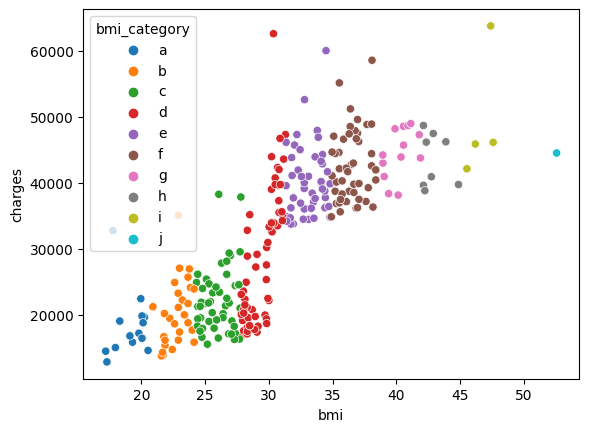

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

smoker_data = data[data['smoker'] == 'yes']

# bmi값을 10등분으로 나누기
smoker_data['bmi_category'] = pd.cut(smoker_data['bmi'], bins=10, labels=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','i','j'])

# 산점도 그리기
sns.scatterplot(data=smoker_data, x='bmi', y='charges', hue='bmi_category')

# 분기점의 bmi 수치 찾기
charges_by_bmi = smoker_data.groupby('bmi_category')['bmi'].mean()
print(charges_by_bmi)

bmi_category
a    18.033696
b    21.809650
c    25.345595
d    29.021887
e    32.670274
f    36.359241
g    39.923148
h    43.502609
i    47.038182
j    51.755000
Name: bmi, dtype: float64


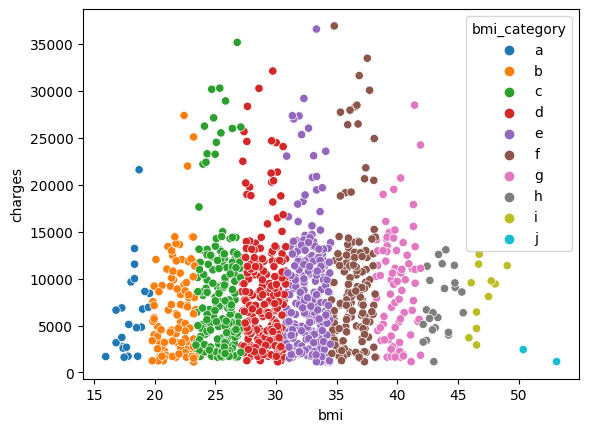

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

smoker_data = data[data['smoker'] == 'no']

# bmi값을 10등분으로 나누기
smoker_data['bmi_category'] = pd.cut(smoker_data['bmi'], bins=10, labels=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','i','j'])

# 산점도 그리기
sns.scatterplot(data=smoker_data, x='bmi', y='charges', hue='bmi_category')

# 분기점의 bmi 수치 찾기
charges_by_bmi = smoker_data.groupby('bmi_category')['bmi'].mean()
print(charges_by_bmi)

In [ ]:
charges_by_bmi = smoker_data.groupby('bmi_category')['charges'].mean()
print(charges_by_bmi)

bmi_category
a    6376.303639
b    6988.583444
c    8357.601620
d    8258.429288
e    8754.629297
f    9585.915863
g    9063.836678
h    7275.138038
i    8188.191527
j    1800.758950
Name: charges, dtype: float64


In [ ]:
df = data[['region', 'charges']]
print(df)

         region      charges
0     southwest  16884.92400
1     southeast   1725.55230
2     southeast   4449.46200
3     northwest  21984.47061
4     northwest   3866.85520
...         ...          ...
1333  northwest  10600.54830
1334  northeast   2205.98080
1335  southeast   1629.83350
1336  southwest   2007.94500
1337  northwest  29141.36030

[1338 rows x 2 columns]


In [5]:
region_mapping = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}
data['region'] = data['region'].map(region_mapping)


df_region_charges = data[['region', 'charges']]

data2 = df_region_charges.corr()

print(data2)


NameError: name 'data' is not defined

In [4]:
sex_mapping = {'female': 0, 'male': 1}
data['sex'] = data['sex'].map(sex_mapping)

smoker_mapping = {'yes': 0, 'no': 1}
data['smoker'] = data['smoker'].map(smoker_mapping)



data3 = data[['age', 'bmi', 'smoker', 'sex']].corrwith(data['children'])

print(data3)



NameError: name 'data' is not defined

In [3]:
data3 = data[['age', 'children', 'smoker', 'sex']].corrwith(data['charges'])

print(data3)

NameError: name 'data' is not defined

In [ ]:
print(data)

      age  sex     bmi  children  smoker  region      charges bmi_category
0      19    0  27.900         0       0       0  16884.92400            d
1      18    1  33.770         1       1       1   1725.55230            e
2      28    1  33.000         3       1       1   4449.46200            e
3      33    1  22.705         0       1       2  21984.47061            b
4      32    1  28.880         0       1       2   3866.85520            d
...   ...  ...     ...       ...     ...     ...          ...          ...
1333   50    1  30.970         3       1       2  10600.54830            e
1334   18    0  31.920         0       1       3   2205.98080            e
1335   18    0  36.850         0       1       1   1629.83350            f
1336   21    0  25.800         0       1       0   2007.94500            c
1337   61    0  29.070         0       0       2  29141.36030            d

[1338 rows x 8 columns]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sex_mapping = {'female': 0, 'male': 1}
data['sex'] = data['sex'].map(sex_mapping)

smoker_mapping = {'yes': 0, 'no': 1}
data['smoker'] = data['smoker'].map(smoker_mapping)



plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: 'southwest'

<Figure size 1000x800 with 0 Axes>

In [ ]:
smoker_data = data[data['smoker'] == 0]
if not smoker_data.empty:
    smoker_data_sorted = smoker_data.sort_values('charges')
    lowest_charge_smoker = smoker_data_sorted.iloc[0]
else:
    lowest_charge_smoker = None

smoker_data = data[data['smoker'] == 'yes']
lowest_charge_smoker = smoker_data.sort_values('charges').iloc[0]


IndexError: single positional indexer is out-of-bounds

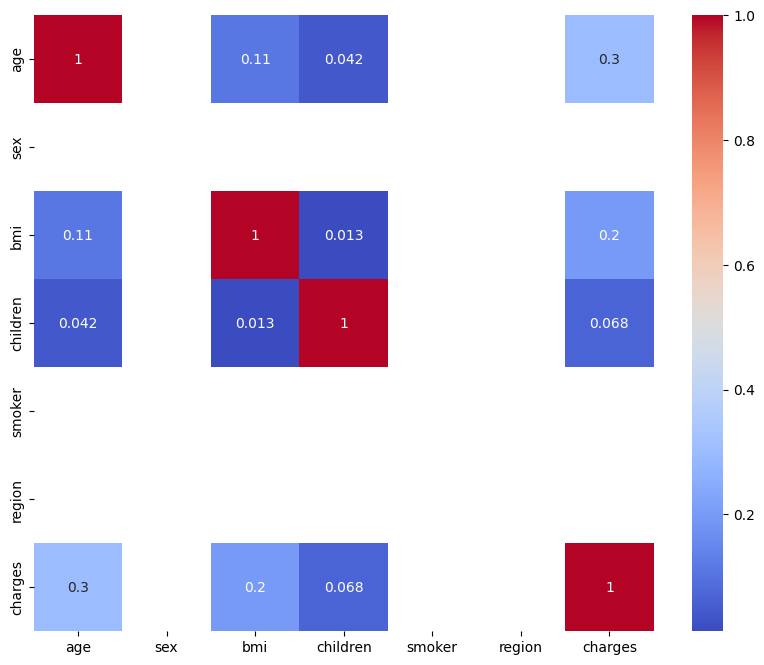

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

region_mapping = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}
data['region'] = data['region'].map(region_mapping)

sex_mapping = {'female': 0, 'male': 1}
data['sex'] = data['sex'].map(sex_mapping)

smoker_mapping = {'yes': 0, 'no': 1}
data['smoker'] = data['smoker'].map(smoker_mapping)


plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [164]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X = data[['age', 'bmi', 'smoker']]
y = data['charges']

X['smoker'] = X['smoker'].replace({'no': 0, 'yes': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


score = model.score(X_test, y_test)
print('R-squared score:', score)


new_data = {'age': 18, 'bmi': 43, 'smoker': 0}
X_new = pd.DataFrame([new_data])
prediction = model.predict(X_new)
print('Predicted insurance cost:', prediction)

R-squared score: 0.8346644445453022
Predicted insurance cost: [1560.1456585]
